In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from datetime import datetime
%matplotlib inline

In [2]:
end = datetime.now()
start = datetime(end.year - 5,end.month,end.day)

symbols = ['BANPU.BK', 'SCCC.BK', 'TOP.BK', 'AKR.BK', 'PTT.BK']
stocks = pd.DataFrame()

for x in symbols:
    stocks[x] = web.DataReader(x, data_source='yahoo', start=start,
    end=end)['Adj Close']

stocks = stocks.dropna()

In [3]:
stocks.head()

,BANPU.BK,SCCC.BK,TOP.BK,AKR.BK,PTT.BK
Date,,,,,
2012-04-10,11.08600,245.804,59.85,0.52658,295.624
2012-04-11,11.00979,244.999,58.77,0.51946,288.848
2012-04-12,13.72490,242.581,59.42,0.53369,291.389
2012-04-13,13.72490,242.581,59.42,0.53369,291.389
2012-04-16,13.72490,242.581,59.42,0.53369,291.389


In [4]:
log_return = pd.DataFrame()
for x in symbols:
    stocks[x + 'Rets'] = np.log(stocks[x] / stocks[x].shift(1))
    log_return[x] = stocks[x + 'Rets']

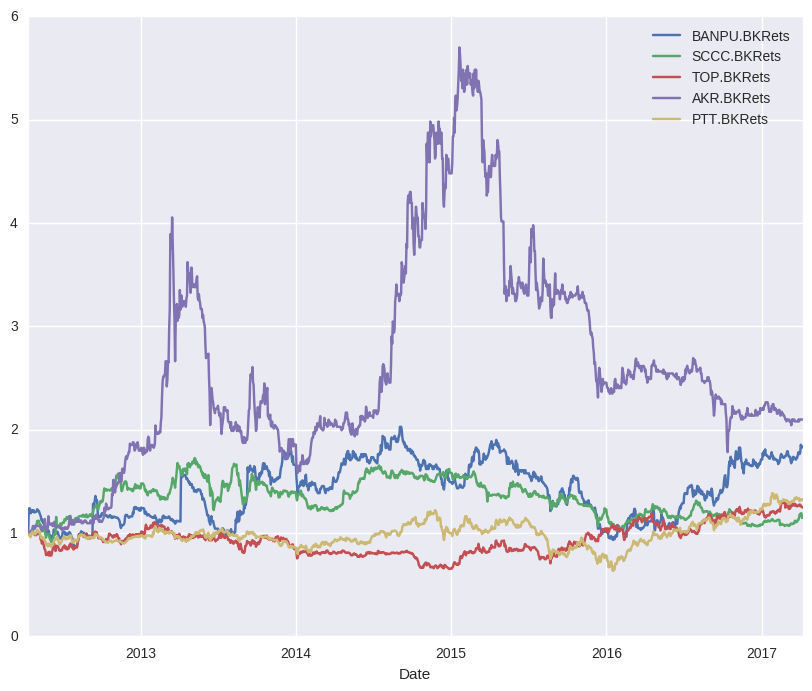

In [5]:
stocks[['BANPU.BKRets', 'SCCC.BKRets', 'TOP.BKRets', 'AKR.BKRets',
 'PTT.BKRets']].cumsum().apply(np.exp).plot(figsize=(10, 8))

In [6]:
log_return.mean()

BANPU.BK    0.000466
SCCC.BK     0.000114
TOP.BK      0.000168
AKR.BK      0.000569
PTT.BK      0.000217
dtype: float64

In [7]:
log_return.mean()*252

BANPU.BK    0.117471
SCCC.BK     0.028614
TOP.BK      0.042346
AKR.BK      0.143347
PTT.BK      0.054572
dtype: float64

In [8]:
rets = log_return.mean() * 252
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [9]:
np.dot(weights, rets)

0.077270242634695174

In [10]:
pvar = np.dot(weights.T, np.dot(log_return.cov() * 252, weights))
pvar

0.044530811280961625

In [11]:
pvol = pvar ** 0.5
pvol

0.21102324820019625

In [12]:
weights = np.random.random(5)
weights

array([ 0.1838034 ,  0.82700612,  0.38353802,  0.52182124,  0.15698952])

In [13]:
weights /= np.sum(weights)
weights

array([ 0.08865864,  0.39891122,  0.1850018 ,  0.25170352,  0.07572481])

In [14]:
np.dot(weights, rets)

0.069877094589373065

In [15]:
np.dot(weights.T, np.dot(log_return.cov() * 252, weights)) ** 0.5

0.21171621016287787

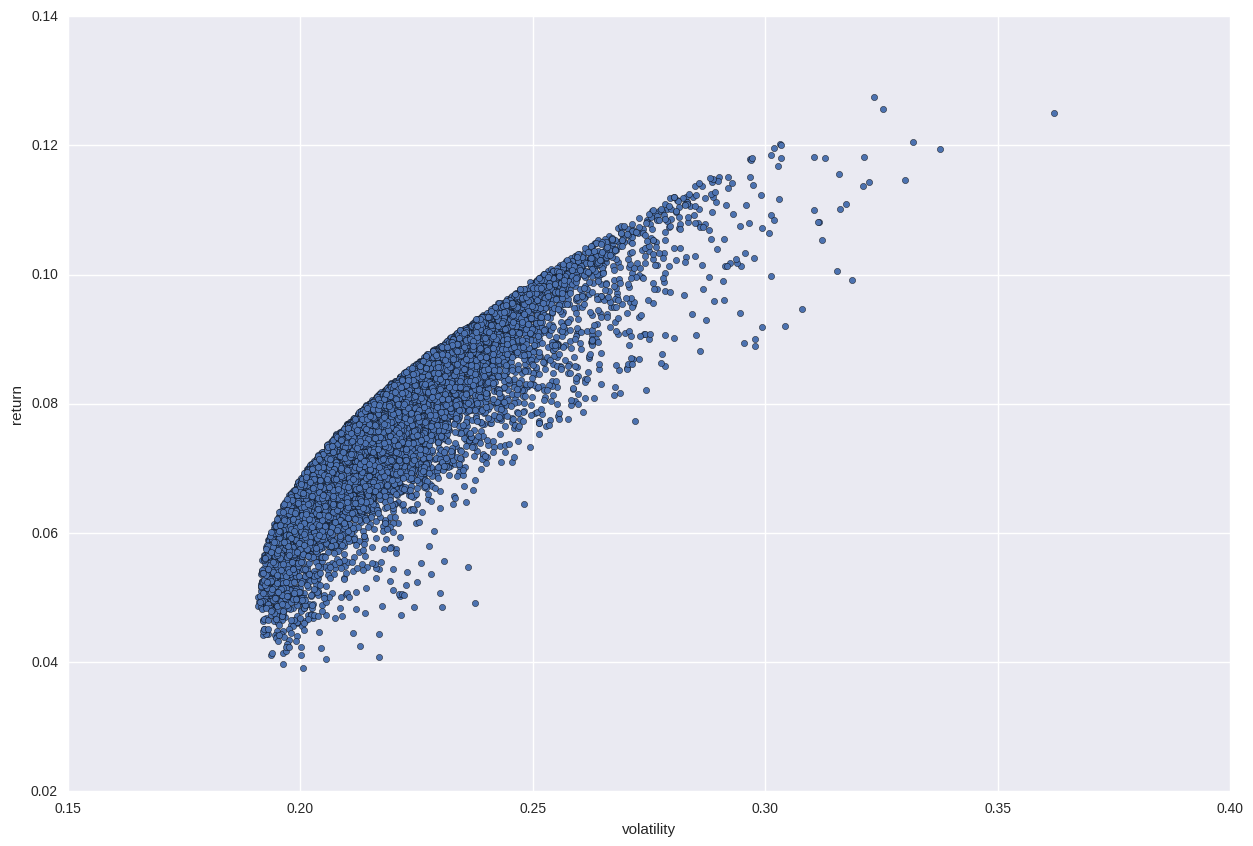

In [16]:
portrets = []
portvols = []
for p in range(10000):
    weights = np.random.random(5)
    weights /= np.sum(weights)
    portrets.append(np.sum(log_return.mean() * weights) * 252)
    portvols.append(np.sqrt(np.dot(weights.T,
    np.dot(log_return.cov() * 252, weights))))
portrets = np.array(portrets)
portvols = np.array(portvols)
portfolio = pd.DataFrame({'return': portrets, 'volatility': portvols})

portfolio.plot(x='volatility', y='return', kind='scatter', figsize=(15, 10))